# Kir Apical Spine Analysis

### Notebook for processing and analyzing Kir spine data from apical dendrites

In [1]:
# Configure Notebook width
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
# Import packages and modules
import os 
import numpy as np
from Lab_Analyses.Kir_Analysis.preprocess_kir_spine_data import organize_kir_spine_data
from Lab_Analyses.Kir_Analysis.kir_spine_activity_analysis import kir_spine_activity_analysis
from Lab_Analyses.Kir_Analysis.kir_spine_coactivity_analysis import kir_spine_coactivity_analysis

from Lab_Analyses.Spine_Analysis_v2 import spine_utilities as s_utils
from Lab_Analyses.Spine_Analysis_v2.spine_activity_dataclass import Grouped_Spine_Activity_Data
from Lab_Analyses.Spine_Analysis_v2.local_coactivity_dataclass import Grouped_Local_Coactivity_Data
from Lab_Analyses.Kir_Analysis import kir_spine_utilities as k_utils
from Lab_Analyses.Kir_Analysis.kir_spine_activity_dataclass import Grouped_Kir_Spine_Activity_Data
from Lab_Analyses.Kir_Analysis.kir_spine_coactivity_dataclass import Grouped_Kir_Coactivity_Data
from Lab_Analyses.Kir_Analysis import kir_spine_plotting as plotting

C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Datasets
Specify the mice to be analyzed and other parameters

In [3]:
# Mouse ids
id_1 = "JW264"
id_2 = "JW265"
id_3 = "JW275"

mouse_list = [id_1, id_2, id_3]

# FOV type
fov_type = "apical"

# Preprocessing parameters
reprocess = True
resmooth = True
redetection = True
followup=True
plot_norm=True

# Analysis parameters
activity_window = (-2,4) ## In seconds
zscore = False
volume_norm = True
extend_dendrite = None
cluster_dist = 10
days = ["Early", "Middle"]
movement_periods = [None, "movement", "nonmovement"]
partners = None
save_ind = True
save_grouped = False

## Preprocess data

In [5]:
# Preprocess and reorganize the imaging datasets
for mouse in mouse_list:
    organize_kir_spine_data(
        mouse,
        fov_type=fov_type,
        redetection=redetection,
        resmooth=resmooth,
        reprocess=reprocess,
        save=True,
        followup=followup,
    )

--------------------------------------------------
Processing Mouse JW264
- Preprocessing FOV2_apical
--- aligning Early datasets
--- aligning Middle datasets
--- aligning Late datasets
--- organizing Early datasets
--- organizing Middle datasets
--- organizing Late datasets
- Preprocessing FOV3_apical
--- aligning Early datasets
--- aligning Middle datasets
--- organizing Early datasets
--- organizing Middle datasets
--------------------------------------------------
Processing Mouse JW265
- Preprocessing FOV3_apical
--- aligning Early datasets
--- aligning Middle datasets
--- organizing Early datasets
--- organizing Middle datasets
--------------------------------------------------
Processing Mouse JW275
- Preprocessing FOV3_apical
--- aligning Early datasets
--- aligning Middle datasets
--- organizing Early datasets
--- organizing Middle datasets


## Data analysis

### Spine Activity

In [6]:
# Perform spine- and dendrite-centric analysis
for day in days:
    print(f"================ {day} =================")
    kir_spine_activity_analysis(
        mice_list=mouse_list,
        session=day,
        fov_type=fov_type,
        activity_window=activity_window,
        zscore=zscore,
        save_ind=save_ind,
        save_grouped=save_grouped
    )
    print(f"======================================")

================ Early =================
----------------------------------------
- Analyzing JW264
-- FOV2_apical
-- FOV3_apical
----------------------------------------
- Analyzing JW265
-- FOV3_apical
----------------------------------------
- Analyzing JW275
-- FOV3_apical
================ Middle =================
----------------------------------------
- Analyzing JW264
-- FOV2_apical
-- FOV3_apical
----------------------------------------
- Analyzing JW265
-- FOV3_apical
----------------------------------------
- Analyzing JW275
-- FOV3_apical


### Local Coactivity

In [7]:
# Perform local coactivity analysis
for day in days:
    print(f" {day} ".center(40, "#"))
    for movement in movement_periods:
        if movement is None:
            print(" ALL PERIODS ".center(40,"="))
        else:
            print(f" {movement.upper()} ".center(40,"="))
        kir_spine_coactivity_analysis(
            mice_list=mouse_list,
            session=day,
            fov_type=fov_type,
            activity_window=activity_window,
            cluster_dist=cluster_dist,
            zscore=zscore,
            partners=partners,
            movement_period=movement,
            save_ind=save_ind,
            save_grouped=save_grouped
        )
        print("========================================")
    print(f"########################################")

################ Early #################
============= ALL PERIODS ==============
-------------------------------------------------
- Analyzing JW264
-- FOV2_apical
---- Calculating distance-dependent coactivity


c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Spine_Analysis_v2\spine_utilities.py:413: RuntimeWarning: Mean of empty slice
  near = np.nanmean(near, axis=0)
c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Spine_Analysis_v2\spine_utilities.py:417: RuntimeWarning: Mean of empty slice
  distant = np.nanmean(distant, axis=0)
C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\lib\nanfunctions.py:1218: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


---- Assessing properties of nearby spines


C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\lib\nanfunctions.py:1096: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


---- Analyzing coactive and noncoactive events
---- Analyzing nearby spine activity
-- FOV3_apical
---- Calculating distance-dependent coactivity
---- Assessing properties of nearby spines


c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Spine_Analysis_v2\variable_spatial_clustering.py:164: RuntimeWarning: Mean of empty slice
  local_avg[spine] = np.nanmean(spine_data[nearby_spines])


---- Analyzing coactive and noncoactive events
---- Analyzing nearby spine activity


c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Spine_Analysis_v2\nearby_coactive_spine_activity.py:254: RuntimeWarning: Mean of empty slice
  nearby_onsets = [np.nanmean(x) for x in spine_wise_onsets]
C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


-------------------------------------------------
- Analyzing JW265
-- FOV3_apical
---- Calculating distance-dependent coactivity
---- Assessing properties of nearby spines


c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Spine_Analysis_v2\spine_utilities.py:149: RuntimeWarning: Mean of empty slice
  binned_data.append(np.nanmean(data[idxs]))


---- Analyzing coactive and noncoactive events
---- Analyzing nearby spine activity
-------------------------------------------------
- Analyzing JW275
-- FOV3_apical
---- Calculating distance-dependent coactivity
---- Assessing properties of nearby spines
---- Analyzing coactive and noncoactive events
---- Analyzing nearby spine activity
=============== MOVEMENT ===============
-------------------------------------------------
- Analyzing JW264
-- FOV2_apical
---- Calculating distance-dependent coactivity
---- Assessing properties of nearby spines
---- Analyzing coactive and noncoactive events
---- Analyzing nearby spine activity
-- FOV3_apical
---- Calculating distance-dependent coactivity
---- Assessing properties of nearby spines
---- Analyzing coactive and noncoactive events
---- Analyzing nearby spine activity
-------------------------------------------------
- Analyzing JW265
-- FOV3_apical
---- Calculating distance-dependent coactivity
---- Assessing properties of nearby spines

## Visualize data

In [8]:
# Set up control mouse lists
ctl_1 = "JW082"
ctl_2 = "JW083" 
ctl_3 = "JW090"
ctl_4 = "JW092"
#id_5 = "JW126" # Not using
ctl_6 = "JW129" 
ctl_7 = "JW130" 
ctl_8 = "JW153"
ctl_9 = "JW150"
ctl_10 = "JW168"
ctl_11 = "JW202"


ctl_mouse_list = [ctl_1, ctl_2, ctl_3, ctl_4, ctl_6, ctl_7, ctl_8, ctl_9, ctl_10, ctl_11]

In [9]:
# Load the dataset
## Control data
early_ctl_activity_data = s_utils.batch_load_individual_analyzed_datasets(
    type="Activity",
    session="Early",
    norm=True,
    activity_type="dFoF",
    extended=None,
    mice_list=ctl_mouse_list,
    fov_type="apical",
    period=None,
    partner=None,
)
early_ctl_activity_data = Grouped_Spine_Activity_Data(early_ctl_activity_data)

e_ctl_coactivity_data = s_utils.batch_load_individual_analyzed_datasets(
    type="Local",
    session="Early",
    norm=True,
    activity_type="dFoF",
    extended=None,
    mice_list=ctl_mouse_list,
    fov_type="apical",
    period=None,
    partner=None,
)
e_ctl_coactivity_data = Grouped_Local_Coactivity_Data(e_ctl_coactivity_data)

## Kir data
early_kir_activity_data = k_utils.batch_load_individual_kir_analyzed_datasets(
    type="Activity",
    session="Early",
    activity_type="dFoF",
    mice_list=mouse_list,
    fov_type="apical",
    period=None,
    partner=None,
)
early_kir_activity_data = Grouped_Kir_Spine_Activity_Data(early_kir_activity_data)

e_kir_coactivity_data = k_utils.batch_load_individual_kir_analyzed_datasets(
    type="Coactivity",
    session="Early",
    activity_type="dFoF",
    mice_list=mouse_list,
    fov_type="apical",
    period=None,
    partner=None,
)
e_kir_coactivity_data = Grouped_Kir_Coactivity_Data(e_kir_coactivity_data)

### Basic Properties

Kir spines: 112
Ctl spines: 509


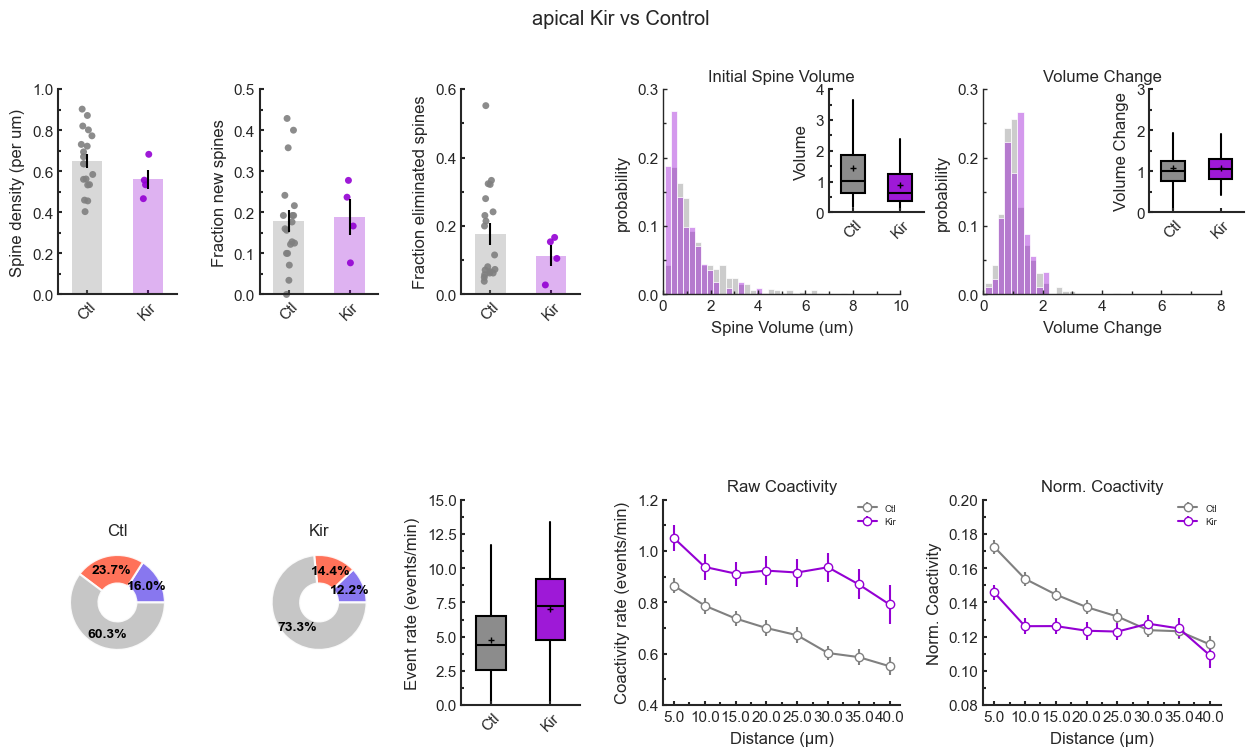

In [12]:
plotting.plot_kir_vs_ctl_basic_props(
    kir_activity_dataset=early_kir_activity_data,
    ctl_activity_dataset=early_ctl_activity_data,
    kir_coactivity_dataset=e_kir_coactivity_data,
    ctl_coactivity_dataset=e_ctl_coactivity_data,
    fov_type="apical",
    figsize=(15,8),
    threshold=(0.25, 0.5),
    showmeans=True,
    hist_bins=30,
    save=False,
    save_path=None
)